<a href="https://colab.research.google.com/github/HyoengMin/HyeongMin_Portfolio/blob/main/SpinePixy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기본 데이터
<b>Libraries</b>                    <br>
<strong>Medical_Image_Data</strong> <br>
<i>Patient_Diagnosis_Data</i>       <br>
<em>Patient_Surgery_Data</em>   <br><br>
<small>small</small>, <mark>mark</mark>, <del>del</del>, <ins>ins</ins>, <sub>sub</sub>, <sup>sup</sup>

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
Medical_Image_Data = pd.read_csv('Medical_Image_Data.csv', encoding = 'CP949')
Patient_Diagnosis_Data = pd.read_csv('Patient_Diagnosis_Data.csv')
Patient_Surgery_Data = pd.read_csv('Patient_Surgery_Data.csv')

# print(Medical_Image_Data.columns, Patient_Diagnosis_Data.columns, Patient_Surgery_Data.columns, sep = '\n\n')

In [ ]:
t1 = Medical_Image_Data.merge(Patient_Diagnosis_Data, on = '환자ID')
t2 = t1.merge(Patient_Surgery_Data, on = '환자ID')
df = t2.drop(columns = ['신장_y', '연령_y', '입원일자_y', '체중_y', '퇴원일자_y', '헤모글로빈수치_y', '환자통증정도_y', '통증기간(월)_y'])

df['통증기간(월)_x'].fillna(df['통증기간(월)_x'].median(), inplace = True)
df['수술시간'].fillna(df['수술시간'].median(), inplace = True)

df['지방축적도'].fillna(df['지방축적도'].median(), inplace = True)
df['PI'].fillna(df['PI'].median(), inplace = True)
df['PT'].fillna(df['PT'].median(), inplace = True)
df['Seg Angle(raw)'].fillna(df['Seg Angle(raw)'].median(), inplace = True)
df['디스크단면적'].fillna(df['디스크단면적'].median(), inplace = True)
df['헤모글로빈수치_x'].fillna(df['헤모글로빈수치_x'].median(), inplace = True)

df['직업'].fillna('기타', inplace = True)
df['수술기법'].fillna('기타', inplace = True)
df['가족력'].fillna(0, inplace = True)

# df['ODI'].fillna(df['ODI'].median(), inplace = True)
df['골밀도'].fillna(df['골밀도'].median(), inplace = True)

df.rename(columns = {'체중_x' : '체중', '신장_x' : '신장', '연령_x' : '연령', '입원일자_x' : '입원일자', '퇴원일자_x' : '퇴원일자',
                     '헤모글로빈수치_x' : '헤모글로빈수치', '환자통증정도_x' : '환자통증정도', '통증기간(월)_x' : '통증기간(월)'}, inplace = True)

df_m = df.query('성별 == 1')
df_f = df.query('성별 == 2')
df_im = df.query('(수술기법 == "IELD") and (성별 == 1)')
df_if = df.query('(수술기법 == "IELD") and (성별 == 2)')
df_tm = df.query('(수술기법 == "TELD") and (성별 == 1)')
df_tf = df.query('(수술기법 == "TELD") and (성별 == 2)')

# 통증 기간/정도/ODI/재발율

## 직업별 통증기간 / 통증정도

In [ ]:
job_pain = Patient_Diagnosis_Data.groupby('직업')['통증기간(월)', '환자통증정도'].mean()
job_pain.head()

<ipython-input-3-38c269d0d3ca>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  job_pain = Patient_Diagnosis_Data.groupby('직업')['통증기간(월)', '환자통증정도'].mean()


,통증기간(월),환자통증정도
직업,,
건설업,3.794118,7.117647
공무원,5.926471,7.058824
교사,10.666667,6.666667
군인,3.844444,6.711111
노동직,3.690476,7.547619


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows = 1, cols = 2)
fig.add_trace(go.Bar(x = job_pain.index, y = job_pain['통증기간(월)'], name = '직업별 통증기간'),1,1)
fig.add_trace(go.Bar(x = job_pain.index, y = job_pain['환자통증정도'], name = '직업별 통증정도'),1,2)

fig.update_layout(title_text="직업별 통증기간과 통증정도")

fig.show()

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='통증기간', x=job_pain.index, y=job_pain['통증기간(월)']),
    go.Bar(name='통증정도', x=job_pain.index, y= job_pain['환자통증정도'])
])

fig.update_layout(title_text="직업별 통증기간과 통증정도")
fig.update_layout(barmode='group')
fig.show()

## 직업별 ODI 평균

In [ ]:
job_odi = Patient_Diagnosis_Data.groupby('직업')['ODI'].mean()
job_odi.head()

직업
건설업    33.400000
공무원    32.363636
교사     28.600000
군인     26.619048
노동직    38.687500
Name: ODI, dtype: float64

In [ ]:
import plotly.express as px

fig = px.bar(job_odi, x=job_odi.index, y=job_odi.values, title='직업별 ODI 평균')

fig.show()

## 연령별 ODI 평균

In [ ]:
age_odi = Patient_Diagnosis_Data.groupby('연령')['ODI'].mean()
age_odi.head()

연령
15     NaN
16    30.5
17    32.0
18    30.0
19    27.0
Name: ODI, dtype: float64

In [ ]:
fig = px.bar(age_odi, x=age_odi.index, y=age_odi.values, title='연령별 ODI 평균')
fig.show()

## 재발율

### 전체

In [ ]:
Patient_Surgery_Data['재발여부'].sum()
# 227 + 1667 = 1894

227

In [ ]:
fig = go.Figure(data=[go.Pie(labels=['재발 환자 수', '나머지'],
                             values=[227, 1667])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=['#ED7D31', '#e6e8e7'], line=dict(color='#666666', width=1)),
                  hole = 0.4)
fig.show()

### 직업별 재발율

In [ ]:
patient_re_job = pd.concat([Patient_Diagnosis_Data.fillna({'직업':'미응답'}), Patient_Surgery_Data], axis = 1)
patient_re_job.head()

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,신장,연령,입원일자,재발여부,체중,퇴원일자,헤모글로빈수치,환자통증정도,통증기간(월),혈액형
0,1PT,22.8,3,51.0,0.0,0,0,0,0,0,...,163,66,20190713,0,60.3,20190716,13.66,10,1.0,RH+A
1,2PT,44.9,4,26.0,0.0,0,0,0,0,0,...,171,47,20190715,0,71.7,20190716,13.73,10,1.0,RH+A
2,3PT,53.0,3,NaN,0.0,0,0,1,0,0,...,178,39,20190729,0,77.1,20190801,15.34,7,1.0,RH+B
3,4PT,54.7,4,18.0,0.0,0,1,0,0,0,...,174,40,20190731,0,74.2,20190803,15.38,7,2.0,RH+O
4,5PT,53.8,4,NaN,0.0,0,1,0,0,0,...,183,42,20190903,0,80.7,20190907,13.08,7,1.0,RH+A


In [ ]:
fig_job_re = px.pie(patient_re_job, values = '재발여부', names = '직업', title = '직업별 재발여부')
fig_job_re.show()

### 연령별 재발율

In [ ]:
def age_judge(age):
  if age < 20:
    return '10대'
  elif age < 30:
    return '20대'
  elif age < 40:
    return '30대'
  elif age < 50:
    return '40대'
  elif age < 60:
    return '50대'
  else:
    return '그 외'

In [ ]:
patient_re_age = pd.concat([Patient_Diagnosis_Data, Patient_Surgery_Data.drop(columns=['연령'])], axis = 1)
# patient_re_age.head()
patient_re_age['연령대'] = patient_re_age['연령'].apply(age_judge)

In [ ]:
fig_re_age = px.pie(patient_re_age, values = '재발여부', names = '연령대', title = '연령대별 재발여부')
fig_re_age.show()

In [ ]:
tt = patient_re_age.groupby('연령대')['재발여부'].count()
tt = tt.reset_index()
tt

,연령대,재발여부
0,10대,68
1,20대,324
2,30대,469
3,40대,581
4,50대,272
5,그 외,180


In [ ]:
fig = go.Figure(data=[go.Pie(values = tt['재발여부'], labels = tt['연령대'],
                             direction ='counterclockwise',
                             hole = .4,
                             sort = False,
                             pull = [0.02, 0.02, 0.02, 0.02, 0.02, 0.02])])

fig.update_traces(marker = {'colors' : px.colors.qualitative.Pastel}, textposition = 'inside', textinfo = 'percent', rotation = 347)
fig.update_layout(font = {'family' : 'Arial Black', 'size' : 24})
fig.show()

# 다시 그리기

## Line / Bar Plot

### 의료 기관 추천 의향

In [ ]:
yy = [2017, 2018, 2019]
cc = [85.9, 80.7, 81.0]

fig = go.Figure()
fig.update_layout(template = 'plotly_white', width = 500,
                  font = {'family' : 'Arial Black', 'size' : 15})

fig.add_trace(go.Bar(x = yy, y = cc,
                marker_color='#ffddaa'))
fig.update_traces(text = ['85.9', '', ''], textposition = 'outside')

fig.add_trace(go.Scatter(x = yy, y = cc,
              marker_color='rgb(255, 50, 50)',
              line=dict(color='rgb(230,115,40)', width=4),
              mode="lines+text", text = ['', '', '81.0'],
              textposition = 'top center'))

fig.add_annotation(x = 2018, y = 80.7, text = '80.7', showarrow = True, arrowhead = 2,
                   xshift = 0, yshift = 0, ax = 30, ay = -20)

fig.show()

### 수술 환자 수

In [ ]:
Patient_Surgery_Data['수술일자dt'] = pd.to_datetime(Patient_Surgery_Data['수술일자'], format = '%Y%m%d')

In [ ]:
surdt = px.histogram(Patient_Surgery_Data, x = '수술일자dt', color = '재발여부', color_discrete_sequence=['#a6a8a7', '#ed7d31'])
surdt.show()
# chn = px.bar(x = ,
#        y = [1331, 1506, 5641, 3865, 2700, 7688, 26527, 17471],
#        text = ['1331', '1506', '5641', '3865', '2700', '7688', '26527', '17471'],
#        color_discrete_sequence = ["#ed7d31"])

# # chn = px.bar(rr, x = '혈액형', y = 0, text = ['12.2', '11.1', '14.7', '9.6'], color= ["#d9d9d9", "#d9d9d9", "#ed7d31", "#d9d9d9"], color_discrete_map = 'identity')

# chn.update_xaxes(title_text='', showgrid = False, showline = True, linewidth = 2, linecolor = 'black')
# chn.update_yaxes(title_text='', showgrid = False, showticklabels=False, range = [500, 29000])

# # chn.add_annotation(xref = 'paper', x = 0, y = 12, text = '평균<br>12.0', showarrow = True, arrowhead = 3, xshift = 0, yshift = 0, ax = -50, ay = 0)

# chn.update_traces(width = 0.7, textposition = 'outside')

# chn.update_layout(autosize = False, margin = {'b' : 0, 't' : 0, 'l' : 0, 'r' : 0},
#                   # xaxis={'categoryorder': 'total descending'},
#                   paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)',
#                   width = 800, height = 500,
#                   font = {'family' : 'Arial Black', 'size' : 24}, showlegend = False)

### 코로나 확진자 수

In [ ]:
chn = px.bar(x = ['2020년 6월', '7월', '8월', '9월', '10월', '11월', '12월', '2021년 1월'],
       y = [1331, 1506, 5641, 3865, 2700, 7688, 26527, 17471],
       text = ['1331', '1506', '5641', '3865', '2700', '7688', '26527', '17471'],
       color_discrete_sequence = ["#ed7d31"]*8)

# chn = px.bar(rr, x = '혈액형', y = 0, text = ['12.2', '11.1', '14.7', '9.6'], color= ["#d9d9d9", "#d9d9d9", "#ed7d31", "#d9d9d9"], color_discrete_map = 'identity')

chn.update_xaxes(title_text='', showgrid = False, showline = True, linewidth = 2, linecolor = 'black')
chn.update_yaxes(title_text='', showgrid = False, showticklabels=False, range = [500, 29000])

# chn.add_annotation(xref = 'paper', x = 0, y = 12, text = '평균<br>12.0', showarrow = True, arrowhead = 3, xshift = 0, yshift = 0, ax = -50, ay = 0)

chn.update_traces(width = 0.7, textposition = 'outside')

chn.update_layout(autosize = False, margin = {'b' : 0, 't' : 0, 'l' : 0, 'r' : 0},
                  # xaxis={'categoryorder': 'total descending'},
                  paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)',
                  width = 800, height = 500,
                  font = {'family' : 'Arial Black', 'size' : 24}, showlegend = False)


### 의료 서비스 불만족 사유

In [ ]:
wanin = ['<b>긴 대기시간</b>', '비싼 의료비', '치료 결과 미흡', '불친절', '불필요한 검사', '불성실']
wanin.reverse()

biyul = [23.1, 23.1, 16.8, 10.6, 8.7, 8.6]
biyul.reverse()

sekkal = [0,]*6
sekkal[5] = 1

In [ ]:
fig5 = px.bar(x = wanin, y = biyul, text = biyul,
              color= ["#dddddd", "#dddddd", "#dddddd", "#dddddd", "#dddddd", "#ed7d31"], color_discrete_map = 'identity',
              template = 'plotly_white')

fig5.update_traces(textposition = 'outside')
fig5.update_layout(font = {'family' : 'Arial Black', 'size' : 15})

fig5.show()

## pie plot

### 코로나 이후 병원 방문이 두려운가

In [ ]:
a = [10.2, 28.3, 21.7, 23.4, 16.4]
b = ['매우 그렇다', '<b>그렇다</b>', '보통이다', '아니다', '매우 아니다']

In [ ]:
fig = px.pie(values = a, color_discrete_sequence = px.colors.qualitative.Pastel, hole = 0.4,
             names = b, title = '코로나 이후 병원 방문이 꺼려지는가?')
fig.update_traces(textposition = 'inside', textinfo = 'percent', rotation = 330)
fig.update_layout(font = {'size' : 24})
fig.show()

In [ ]:
fig = go.Figure(data=[go.Pie(labels = b, values = a,
                              direction ='clockwise',
                              hole = .4,
                              sort = False,
                             )])

fig.update_traces(marker = {'colors' : px.colors.qualitative.Pastel}, textposition = 'inside', textinfo = 'percent', rotation = 60)
fig.update_layout(font = {'family' : 'Arial Black', 'size' : 24})
fig.show()

### 방문 빈도 변화, 방문 횟수 감소 원인

In [ ]:
fig = go.Figure(data=[go.Pie(labels = ['<b>12%</b>', '<b>18%</b>', '<b> 12% </b>', '51%', '7%'],
                             values = [12, 18, 12, 51, 7],
                             direction = 'clockwise',
                             hole = .4, sort = False, pull = [0.1, 0.075, 0.05, 0, 0])])

fig.update_traces(marker = {'colors' : ['#ED7D32', '#F7B028', '#D68422', '#D65022', '#F73E28']}, textposition = 'inside', textinfo = 'label', rotation = 0)
fig.update_layout(font = {'size' : 24})
fig.show()

In [ ]:
fig = go.Figure(data=[go.Pie(labels = ['<b>51%</b>', '34%', '15%'],
                             values = [51, 34, 15],
                             direction = 'counterclockwise',
                             hole = .4, sort = False, pull = [0.02, 0.02, 0.02])])

fig.update_traces(marker = {'colors' : ['#ed7d31', '#f9cb9c', '#eeeeee']}, textposition = 'inside', textinfo = 'label', rotation = 267)
fig.update_layout(font = {'size' : 24})
fig.show()

# 분석

## 디스크위치에 따라
* 35 = 3번, 5번 동시 발병  
C1-3 디스크
두통 (경추성 두통), 뒷골 당김, 목통증

C4-5 디스크
목통증, 어깨통증, 어깨 근력 감소

C5-7 디스크
팔, 손저림 등 (견갑골 사이) 통증,
감각저하, 근력감소

In [ ]:
df.groupby('디스크위치')['재발여부'].sum()

In [ ]:
df.groupby('디스크위치').count()['환자ID']

디스크위치
1        1
2       27
3      112
4     1458
5      271
10       2
11       2
12       1
23       1
25       1
34       8
35       1
45       9
Name: 환자ID, dtype: int64

In [ ]:
tt = df.groupby('디스크위치')['재발여부'].sum() / df.groupby('디스크위치').count()['환자ID'] * 100
# pd.DataFrame([tt,df.groupby('디스크위치').count()['환자ID']])
tt

디스크위치
1       0.000000
2      14.814815
3       8.035714
4      12.277092
5      11.439114
10      0.000000
11     50.000000
12      0.000000
23      0.000000
25      0.000000
34     12.500000
35    100.000000
45     11.111111
dtype: float64

In [ ]:
px.bar(tt)

## MF + ES
* 재활 설득에 사용
* ---> 재활 설득에 사용하려고했으나, 재발율이 가장 적은 구간은 1500~2000 이어서, 근육량을 높여라의 근거가 될지 모르겠음

In [ ]:
def generation(x) :
  if x >= 3000 :
    return('3000>')
  elif x >= 2500 :
   return('2500~3000')
  elif x >= 2000 :
   return('2000~2500')
  elif x >= 1500 :
   return('1500~2000')
  elif x >= 1000 :
   return('1000~1500')
  else :
   return('1000<')

In [ ]:
df['MFES'] = df['MF + ES'].agg(generation)
df['MFES'].unique()

array(['1500~2000', '1000~1500', '2500~3000', '2000~2500', '3000>'],
      dtype=object)

In [ ]:
# df['MF + ES'].
# df.groupby('MFES')['재발여부'].sum()
# df.groupby('MFES').count()['환자ID']
rr = df.groupby('MFES')['재발여부'].sum() / df.groupby('MFES').count()['환자ID'] * 100
rr = pd.DataFrame(rr)
print(rr.head())
px.bar(rr)

                   0
MFES                
1000~1500  11.585366
1500~2000   8.345534
2000~2500  14.744526
2500~3000  13.712375
3000>      14.285714


In [ ]:
color_discrete_sequence = ['#ed7d31']*len(df)
fig = px.bar(rr,color_discrete_sequence=color_discrete_sequence,orientation='h',
             category_orders={"MFES": ["1000~1500", "1500~2000", "2000~2500", "2500~3000", "3000>"]})
fig.update_layout(paper_bgcolor='rgb(230,231,232)', plot_bgcolor='rgb(230,231,232)',showlegend=False,xaxis=dict(tickangle=0),
                  font = {'size' : 25}, width=800, height=500 )
fig.update_xaxes(title_text=None,showgrid=False)
fig.update_yaxes(title_text=None)

fig.show()

## 척추이동척도
* 척추 측만이 어느정도인지 파악하는 컬럼으로 판단됨
* 척추측만의 정도가 -> 아예 없음, 낮게 있음, 보통, 높게 있음, 아주 높음 구분된 데이터
* 척추측만이 높게 있거나 아주 높게 있을 때의 환자수가 유의미하지 않으므로 데이터 사용X

In [ ]:
move_degree = df.groupby('척추이동척도')['재발여부'].sum() / df.groupby('척추이동척도')['환자ID'].count() * 100
print(move_degree)

척추이동척도
Down              11.500975
Extremely down    15.000000
Extremely up       0.000000
Middle            11.904762
Up                18.461538
dtype: float64


In [ ]:
color_discrete_sequence = ['#ed7d31']*len(df)
# fig = px.bar(move_degree,color_discrete_sequence=color_discrete_sequence,orientation='h',
            #  category_orders={"척추이동척도": ["Extremely down", "Down", "Middle", "Up"]},
            #  text_auto='.2s')
fig = px.bar(y = ['Extremely<br>Down', 'Down', 'Middle', 'Up'], x = [15, 11.5, 11.9, 18.5], orientation = 'h',
             color_discrete_sequence=color_discrete_sequence,text_auto='.2s')
fig.update_traces(textposition='outside')
fig.update_layout(paper_bgcolor='rgb(230,231,232)', plot_bgcolor='rgb(230,231,232)',showlegend=False,xaxis=dict(tickangle=0),
                  font = {'size' : 24}, width=750, height=500)
fig.update_xaxes(title_text=None,showgrid=False)
fig.update_yaxes(title_text=None)
fig.show()

## 척추전방위증
* 청소년기와 노인에게서 자주 보임
* 수술 후 약품으로 후유증/재발 방지


In [ ]:
rr = df.groupby('척추전방위증')['재발여부'].sum() / df.groupby('척추전방위증')['환자ID'].count() * 100
px.bar(rr)

## Large Lymphocyte (림프구)

In [ ]:
def LLgen(x) :
  if x >= 60 :
    return('60>')
  elif x >= 50 :
   return('50~60')
  elif x >= 40 :
   return('40~50')
  elif x >= 30 :
   return('30~40')
  elif x >= 200 :
   return('20~30')
  else :
   return('10~20')

In [ ]:
df['LL'] = df['Large Lymphocyte'].agg(LLgen)
df['LL'].sample(5)

1664    30~40
1621    40~50
570     50~60
684     40~50
1328    40~50
Name: LL, dtype: object

In [ ]:
rr = df.groupby('LL')['재발여부'].sum() / df.groupby('LL')['환자ID'].count() * 100
px.bar(rr)

## Location of herniation (디스크 탈출 위치)
* 1 ~ 5 번

In [ ]:
rr = df.groupby('Location of herniation')['재발여부'].sum() / df.groupby('Location of herniation')['환자ID'].count() * 100
px.bar(rr)

## ODI

In [ ]:
def ODIgen(x) :
  if x >= 60 :
    return('60>')
  elif x >= 50 :
   return('50~60')
  elif x >= 40 :
   return('40~50')
  elif x >= 30 :
   return('30~40')
  elif x >= 20 :
   return('20~30')
  elif x >= 10 :
    return('10~20')
  elif x >= 0 :
    return('0~10')
  else :
   return('기타')

In [ ]:
df['ido'] = df['ODI'].agg(ODIgen)
df['ido'].sample(5)
rr = df.groupby('ido')['재발여부'].sum() / df.groupby('ido')['환자ID'].count() * 100
px.bar(rr)

In [ ]:
imsi = Patient_Diagnosis_Data.merge(right = Patient_Surgery_Data, on = '환자ID')

imsi['ido'] = imsi['ODI'].agg(ODIgen)

gg = imsi.groupby('ido')['재발여부'].sum() / imsi.groupby('ido')['환자ID'].count() * 100
px.bar(gg)

In [ ]:
imsi.groupby('ido')['재발여부'].sum()

ido
0~10       1
10~20      8
20~30      3
30~40     13
40~50     14
50~60      0
60>        0
기타       188
Name: 재발여부, dtype: int64

In [ ]:
imsi.groupby('ido')['환자ID'].count()

ido
0~10        2
10~20      72
20~30     121
30~40     159
40~50      97
50~60       8
60>         3
기타       1432
Name: 환자ID, dtype: int64

## 신장
* 키는 디스크에 큰 영향은 없다고 하네요 다만 키가 큰사람은 허리가 길고 마른체형들이 허리근육이 부족하고 무리하다가 다친다고합니다

In [ ]:
def Hgen(x) :
  if x >= 185 : return('185~')
  elif x >= 180 : return('180~185')
  elif x >= 175 : return('175~180')
  elif x >= 170 : return('170~175')
  elif x >= 165 : return('165~170')
  elif x >= 160 : return('160~165')
  elif x >= 155 : return('155~160')
  elif x >= 150 : return('150~155')
  else : return('140~150')

In [ ]:
df['HH'] = df['신장'].agg(Hgen)
# df['HH'].sample(5)

In [ ]:
# px.histogram(df['신장'], nbins = 30
hhh = px.histogram(df['HH'])
hhh.update_xaxes(categoryorder = 'category ascending')

In [ ]:
rr = df.groupby('HH')['재발여부'].sum() / df.groupby('HH')['환자ID'].count() * 100
px.bar(rr, width = 1200)

In [ ]:
df_m['HH'] = df_m['신장'].agg(Hgen)
df_f['HH'] = df_f['신장'].agg(Hgen)

mfhh = go.Figure()
mfhh.add_trace(go.Histogram(x = df_m['HH']))
mfhh.add_trace(go.Histogram(x = df_f['HH']))
mfhh.update_xaxes(categoryorder = 'category ascending')

<ipython-input-22-13b48b8c305b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-13b48b8c305b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
m_hh = (df_m.groupby('HH')['재발여부'].sum() / df_m.groupby('HH')['환자ID'].count() * 100).reset_index().rename(columns = {0 : 'value'})
f_hh = (df_f.groupby('HH')['재발여부'].sum() / df_f.groupby('HH')['환자ID'].count() * 100).reset_index().rename(columns = {0 : 'value'})

hh = go.Figure()
hh.add_trace(go.Bar(x = m_hh['HH'], y = m_hh['value']))
hh.add_trace(go.Bar(x = f_hh['HH'], y = f_hh['value']))
hh.update_xaxes(categoryorder = 'category ascending')

## 체중

In [ ]:
def Wgen(x) :
  if x >= 95 : return('95~')
  elif x >= 90 : return('90~95')
  elif x >= 85 : return('85~90')
  elif x >= 80 : return('80~85')
  elif x >= 75 : return('75~80')
  elif x >= 70 : return('70~75')
  elif x >= 65 : return('65~70')
  elif x >= 60 : return('60~65')
  elif x >= 55 : return('55~60')
  elif x >= 50 : return('50~55')
  elif x >= 35 : return('35~50')
  else : return('기타')

df['WW'] = df['체중'].agg(Wgen)
# df['WW'].sample(5)

In [ ]:
wwh = px.histogram(df['WW'])
wwh.update_xaxes(categoryorder = 'category ascending')

In [ ]:
rr = df.groupby('WW')['재발여부'].sum() / df.groupby('WW')['환자ID'].count() * 100
px.bar(rr)

In [ ]:
df_m['WW'] = df_m['체중'].agg(Wgen)
df_f['WW'] = df_f['체중'].agg(Wgen)

mfww = go.Figure()
mfww.add_trace(go.Histogram(x = df_m['WW']))
mfww.add_trace(go.Histogram(x = df_f['WW']))
mfww.update_xaxes(categoryorder = 'category ascending')

<ipython-input-27-8cacf569ad7b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-8cacf569ad7b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
m_ww = (df_m.groupby('WW')['재발여부'].sum() / df_m.groupby('WW')['환자ID'].count() * 100).reset_index().rename(columns = {0 : 'value'})
f_ww = (df_f.groupby('WW')['재발여부'].sum() / df_f.groupby('WW')['환자ID'].count() * 100).reset_index().rename(columns = {0 : 'value'})

In [ ]:
ww = go.Figure()
ww.add_trace(go.Bar(x = m_ww['WW'], y = m_ww['value'].round(0), marker_color = ["#a7a7a7"] * 8 + ["#ed7d31"] * 3, texttemplate="%{y} %"))
ww.add_trace(go.Bar(x = f_ww['WW'], y = f_ww['value'].round(0), marker_color = ["#a7a7a7"] * 8 + ["#ed7d31"] * 3, texttemplate="%{y} %"))
ww.update_layout(barmode = "group", bargap = 0.2)
ww.update_traces(opacity=1.0, width = 0.4, textposition = 'outside')
ww.update_xaxes(categoryorder = 'category ascending')

ww.update_xaxes(title_text='', showgrid = False, showline = True, linewidth = 2, linecolor = 'black')
ww.update_yaxes(title_text='', showgrid = False, showticklabels=False)

ww.update_layout(autosize = False, margin = {'b' : 0, 't' : 0, 'l' : 0, 'r' : 0},
                  paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)',
                  width = 1600, height = 400,
                  font = {'family' : 'Arial Black', 'size' : 24}, showlegend = False)

In [ ]:
px.scatter(df, x = '신장_x', y = '체중_x', color = '재발여부',size = '성별', size_max = 12)

## 연령

In [ ]:
px.histogram(df['연령'])

In [ ]:
def Ygen(x) :
  if x >= 80 :
    return('80~')
  elif x >= 70 :
   return('70~80')
  elif x >= 60 :
   return('60~70')
  elif x >= 50 :
   return('50~60')
  elif x >= 40 :
   return('40~50')
  elif x >= 30 :
    return('30~40')
  elif x >= 20 :
    return('20~30')
  elif x >= 10 :
    return('10~20')
  else :
   return('기타')

df['YY'] = df['연령'].agg(Ygen)
df['YY'].sample(5)

127     50~60
961     70~80
1473    50~60
1557    20~30
1677    40~50
Name: YY, dtype: object

In [ ]:
rr = df.groupby('YY')['재발여부'].sum() / df.groupby('YY')['환자ID'].count() * 100
fig = px.bar(rr, color_discrete_sequence=['#ed7d31'], text_auto='.2s')
fig.update_traces(textposition='outside')
fig.update_layout(paper_bgcolor='rgb(230,231,232)', plot_bgcolor='rgb(230,231,232)', showlegend=False, xaxis=dict(tickangle=0),
                  font={'size':25}, width=900, height=700)
fig.update_xaxes(title_text=None)
fig.update_yaxes(title_text=None, showgrid=False)

fig.show()

## 직업

In [ ]:
px.histogram(df['직업'])

In [ ]:
rr = df.groupby('직업')['재발여부'].sum() / df.groupby('직업')['환자ID'].count() * 100
rr = rr.sort_values(ascending=False)

In [ ]:
fig = px.bar(rr, color=['#ed7d31','#ed7d31','#ed7d31']+['#a7a7a7']*15, color_discrete_map='identity', text_auto='.2s')
fig.update_traces(textposition='outside')
fig.update_layout(paper_bgcolor='rgb(230,231,232)', plot_bgcolor='rgb(230,231,232)', showlegend=False, xaxis=dict(tickangle=45),
                  font={'family':'Arial Black', 'size':25}, width=1200, height=800)
fig.update_xaxes(title_text=None)
fig.update_yaxes(title_text=None, showgrid=False)
fig.show()

In [ ]:
df.groupby('직업')['환자ID'].count()

직업
건설업       17
공무원       51
교사        30
군인        90
기타       415
노동직       42
농업        40
무직       164
사무직      449
사업가       39
예술가       10
운동선수      14
운수업       50
의료직       40
자영업      171
주부       114
특수전문직     23
학생       135
Name: 환자ID, dtype: int64

## 헤모글로빈수치_x
* 높은 Hemo --> 폐기종, COPD ?

In [ ]:
px.histogram(df['헤모글로빈수치'])

In [ ]:
def Hemogen(x) :
  if x >= 20 :
    return('20~')
  elif x >= 18 :
   return('18~20')
  elif x >= 16 :
   return('16~18')
  elif x >= 14 :
   return('14~16')
  elif x >= 12 :
   return('12~14')
  elif x >= 5 :
    return('5~12')
  else :
   return('기타')

df['Hemo'] = df['헤모글로빈수치'].agg(Hemogen)
df['Hemo'].sample(5)

rr = df.groupby('Hemo')['재발여부'].sum() / df.groupby('Hemo')['환자ID'].count() * 100
fig = px.bar(rr,color_discrete_sequence=['#ed7d31'], text_auto='.2s')
fig.update_traces(textposition='outside')
fig.update_layout(paper_bgcolor='rgb(230,231,232)', plot_bgcolor='rgb(230,231,232)', showlegend=False, xaxis=dict(tickangle=0),
                  font={'size':25}, width=800, height=700)
fig.update_xaxes(title_text=None)
fig.update_yaxes(title_text=None, showgrid=False)

fig.show()

## 통증기간(월)_x
* 진행중

In [ ]:
rr = df.groupby('통증기간(월)_x')['재발여부'].sum() / df.groupby('통증기간(월)_x')['환자ID'].count() * 100
px.bar(rr)

In [ ]:
df.groupby('통증기간(월)_x')['환자ID'].count()

통증기간(월)_x
0.00        1
0.10        2
0.20        5
0.25        6
0.30        2
0.50        7
0.75        2
0.80        2
1.00      805
1.50       19
2.00      367
2.50        1
3.00      167
3.50        1
4.00       53
4.50        1
5.00       51
6.00       91
7.00       23
8.00       20
9.00       20
10.00      25
11.00       1
12.00      93
13.00       2
14.00       4
15.00       2
16.00       2
17.00       2
18.00       8
21.00       2
22.00       2
24.00      41
30.00       2
32.00       1
36.00      21
46.00       1
48.00       7
60.00      10
63.00       1
84.00       2
96.00       5
108.00      1
120.00      9
180.00      1
240.00      2
360.00      1
Name: 환자ID, dtype: int64

## 혈액형

In [ ]:
px.histogram(df['혈액형'])

In [ ]:
rr = df.groupby('혈액형')['재발여부'].sum() / df.groupby('혈액형')['환자ID'].count() * 100
px.bar(rr)

## 지방축적도

In [ ]:
def FTgen(x) :
  if x >= 350 : return('350~')
  elif x >= 300 : return('300~350')
  elif x >= 250 : return('250~300')
  elif x >= 200 : return('200~250')
  elif x >= 150 : return('150~200')
  elif x >= 100 : return('100~150')
  else : return('0~100')

In [ ]:
# df['FT'].value_counts().sort_index()
# df.groupby('FT')['00'].count()
# 동일

0~100      233
100~150    522
150~200    407
200~250    243
250~300    192
300~350    131
350~400     47
400~       119
Name: FT, dtype: int64

In [ ]:
df['FT'] = df['지방축적도'].agg(FTgen)
px.bar(df.groupby('FT')['재발여부'].sum() / df.groupby('FT')['환자ID'].count() * 100)

In [ ]:
df_m['FT'] = df_m['지방축적도'].apply(FTgen)
df_f['FT'] = df_f['지방축적도'].apply(FTgen)

mfft = go.Figure()
mfft.add_trace(go.Histogram(x = df_m['FT']))
mfft.add_trace(go.Histogram(x = df_f['FT']))
mfft.update_xaxes(categoryorder = 'category ascending')

<ipython-input-30-5f3e853d3166>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-5f3e853d3166>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
m_ft = (df_m.groupby('FT')['재발여부'].sum() / df_m.groupby('FT')['환자ID'].count() * 100).reset_index().rename(columns = {0 : 'value'})
f_ft = (df_f.groupby('FT')['재발여부'].sum() / df_f.groupby('FT')['환자ID'].count() * 100).reset_index().rename(columns = {0 : 'value'})

ft = go.Figure()
ft.add_trace(go.Bar(x = m_ft['FT'], y = m_ft['value']))
ft.add_trace(go.Bar(x = f_ft['FT'], y = f_ft['value']))
# fig.update_xaxes(categoryorder = 'category ascending')

## 범주형 (15개 기저질환)

<ipython-input-42-9875452c1298>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-9875452c1298>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(array([ 140.,    0.,    0.,    0.,    0., 1673.,    0.,    0.,    0.,
          81.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

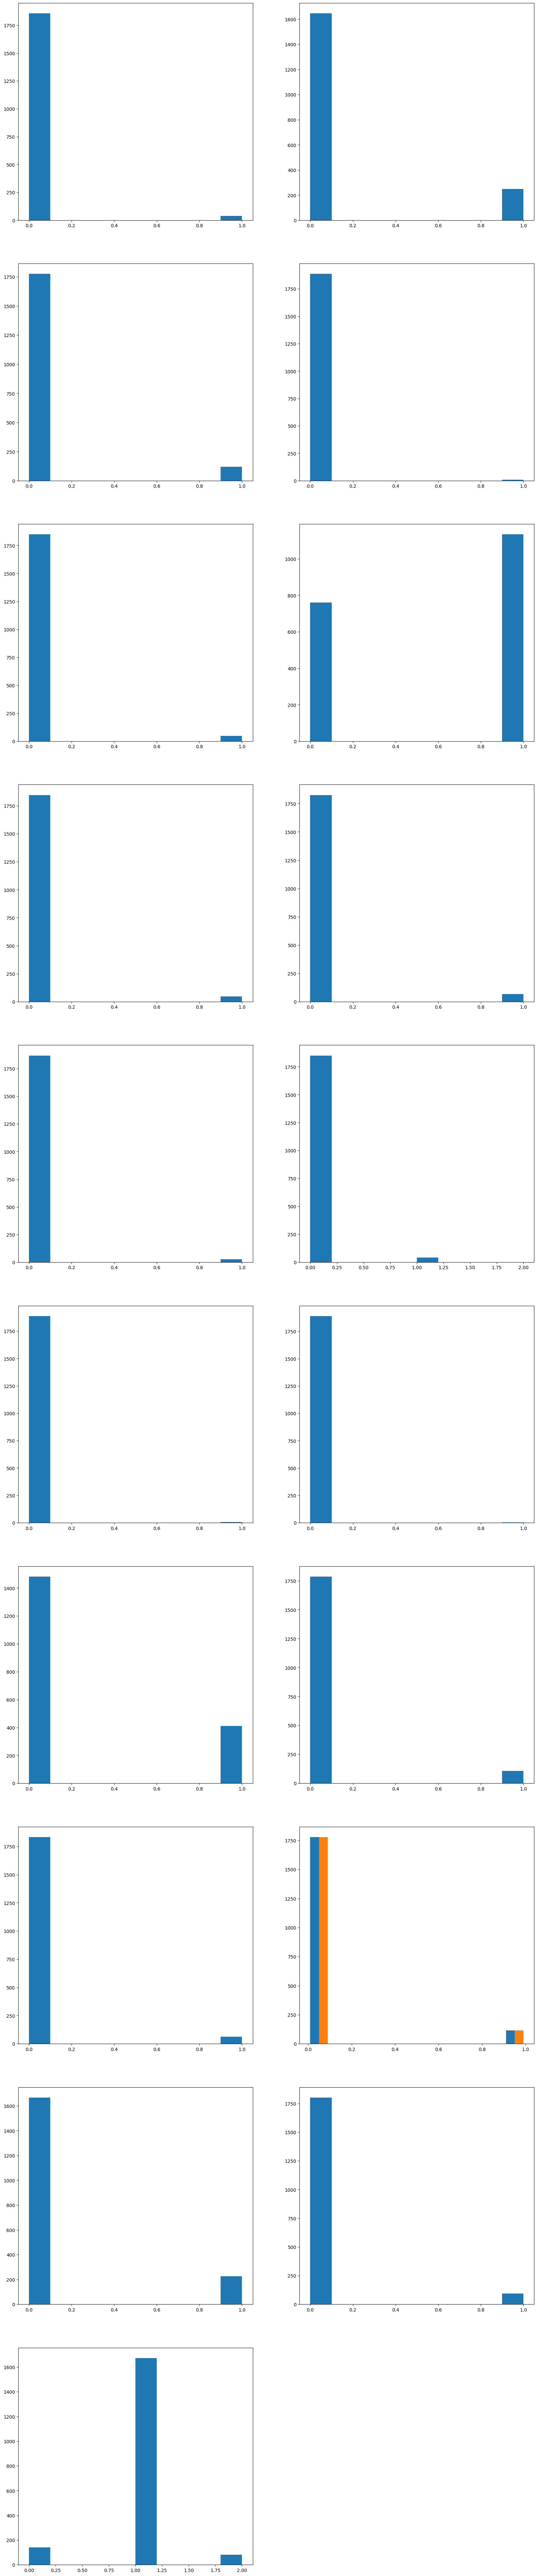

In [ ]:
df_twin = df[['가족력','간질성폐질환', '고혈압여부', '당뇨여부', '말초동맥질환여부', '빈혈여부','스테로이드치료', '신부전여부','심혈관질환', '암발병여부','우울증여부','종양진행여부','혈전합병증여부','흡연여부','Vaccum disc','척추전방위증', '수술기법','수술실패여부','수술실패여부','재발여부']]

def fun_1(x) :
  if x == 'TELD' :
    return(1)
  elif x == 'IELD' :
    return(0)
  else :
    return(2)

df_twin['수술기법변환'] = df_twin['수술기법'].agg(fun_1)

def fun_2(x) :
  if x == 0 :
    return(0)
  elif x == 1 :
    return(1)
  else :
    return(2)

df_twin['가족력변환'] = df_twin['가족력'].agg(fun_2)

df_twin_final = df_twin[['간질성폐질환', '고혈압여부', '당뇨여부', '말초동맥질환여부', '빈혈여부','스테로이드치료', '신부전여부','심혈관질환', '암발병여부','우울증여부','종양진행여부','혈전합병증여부','흡연여부','Vaccum disc','척추전방위증','수술실패여부','재발여부','가족력변환','수술기법변환']]



import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,100))

ax1 = fig.add_subplot(10,2,1)
ax2 = fig.add_subplot(10,2,2)
ax3 = fig.add_subplot(10,2,3)
ax4 = fig.add_subplot(10,2,4)
ax5 = fig.add_subplot(10,2,5)
ax6 = fig.add_subplot(10,2,6)
ax7 = fig.add_subplot(10,2,7)
ax8 = fig.add_subplot(10,2,8)
ax9 = fig.add_subplot(10,2,9)
ax10 = fig.add_subplot(10,2,10)
ax11 = fig.add_subplot(10,2,11)
ax12 = fig.add_subplot(10,2,12)
ax13 = fig.add_subplot(10,2,13)
ax14 = fig.add_subplot(10,2,14)
ax15 = fig.add_subplot(10,2,15)
ax16 = fig.add_subplot(10,2,16)
ax17 = fig.add_subplot(10,2,17)
ax18 = fig.add_subplot(10,2,18)
ax19 = fig.add_subplot(10,2,19)

ax1.hist(df_twin_final['간질성폐질환'])
ax2.hist(df_twin_final['고혈압여부'])
ax3.hist(df_twin_final['당뇨여부'])
ax4.hist(df_twin_final['말초동맥질환여부'])
ax5.hist(df_twin_final['빈혈여부'])
ax6.hist(df_twin_final['스테로이드치료'])
ax7.hist(df_twin_final['신부전여부'])
ax8.hist(df_twin_final['심혈관질환'])
ax9.hist(df_twin_final['암발병여부'])
ax10.hist(df_twin_final['우울증여부'])
ax11.hist(df_twin_final['종양진행여부'])
ax12.hist(df_twin_final['혈전합병증여부'])
ax13.hist(df_twin_final['흡연여부'])
ax14.hist(df_twin_final['Vaccum disc'])
ax15.hist(df_twin_final['척추전방위증'])
ax16.hist(df_twin_final['수술실패여부'])
ax17.hist(df_twin_final['재발여부'])
ax18.hist(df_twin_final['가족력변환'])
ax19.hist(df_twin_final['수술기법변환'])

In [ ]:
df_twin_BIYUL = df_twin_final.query('재발여부 == True').sum() / df_twin_final.sum() * 100
df_twin_BIYUL.drop(['재발여부', '우울증여부', '가족력변환', '수술기법변환'], inplace = True)

In [ ]:
px.bar(df_twin_BIYUL)

#  머신러닝 모델 분석
* Decision Tree 모델 사용

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
X = df.drop(['환자ID', '입원기간', '입원일자', '퇴원일자', 'ODI', '환자통증정도', '통증기간(월)', '수술일자', '재발여부'], axis = 1)
y = df['재발여부']

le1 = preprocessing.LabelEncoder()
le1.fit(X['척추이동척도'])
X['척추이동척도'] = le1.transform(X['척추이동척도'])

le2 = preprocessing.LabelEncoder()
le2.fit(X['직업'])
X['직업'] = le2.transform(X['직업'])

le3 = preprocessing.LabelEncoder()
le3.fit(X['수술기법'])
X['수술기법'] = le3.transform(X['수술기법'])

le4 = preprocessing.LabelEncoder()
le4.fit(X['혈액형'])
X['혈액형'] = le4.transform(X['혈액형'])

In [ ]:
scaler = RobustScaler()
scaler.fit(X)
X_sd = scaler.transform(X)
X_tn, X_te, y_tn, y_te = train_test_split(X_sd, y, test_size = 0.15, random_state = 777)

In [ ]:
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

dtc.fit(X_tn, y_tn)
rfc.fit(X_tn, y_tn)
gbc.fit(X_tn, y_tn)

y_dt = dtc.predict(X_te)
y_rf = rfc.predict(X_te)
y_gb = gbc.predict(X_te)

print('Decision Tree', confusion_matrix(y_te, y_dt), classification_report(y_te, y_dt), sep = '\n')
print('Random Forest', confusion_matrix(y_te, y_rf), classification_report(y_te, y_rf), sep = '\n')
print('Gradient Boosting', confusion_matrix(y_te, y_gb), classification_report(y_te, y_gb), sep = '\n')

Decision Tree
[[221  27]
 [ 13  24]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       248
           1       0.47      0.65      0.55        37

    accuracy                           0.86       285
   macro avg       0.71      0.77      0.73       285
weighted avg       0.88      0.86      0.87       285

Random Forest
[[247   1]
 [ 29   8]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       248
           1       0.89      0.22      0.35        37

    accuracy                           0.89       285
   macro avg       0.89      0.61      0.65       285
weighted avg       0.89      0.89      0.87       285

Gradient Boosting
[[244   4]
 [ 24  13]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       248
           1       0.76      0.35      0.48        37

    accuracy                           0.90       285
   macro avg 

In [ ]:
importances_dtc = dtc.feature_importances_
fi_dtc = pd.DataFrame([X.columns, importances_dtc], index = ['Features', 'Importances']).transpose()
px.line(fi_dtc, x = 'Features', y = 'Importances', markers = True)

In [ ]:
importances_rfc = rfc.feature_importances_
fi_rfc = pd.DataFrame([X.columns, importances_rfc], index = ['Features', 'Importances']).transpose()
px.line(fi_rfc, x = 'Features', y = 'Importances', markers = True)

In [ ]:
importances_gbc = gbc.feature_importances_
fi_gbc = pd.DataFrame([X.columns, importances_gbc], index = ['Features', 'Importances']).transpose()
px.line(fi_gbc, x = 'Features', y = 'Importances', markers = True)

# 3차 분석

## 성별, 수술방법 등 분리

## Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
X_im = df.drop(['환자ID', '입원기간', '입원일자', '퇴원일자', 'ODI', '성별', '수술기법',
                          '환자통증정도', '통증기간(월)', '수술일자', '재발여부'], axis = 1)
y_im = df['재발여부']

X_if = df.drop(['환자ID', '입원기간', '입원일자', '퇴원일자', 'ODI', '성별', '수술기법',
                          '환자통증정도', '통증기간(월)', '수술일자', '재발여부'], axis = 1)
y_if = df['재발여부']

X_tm = df.drop(['환자ID', '입원기간', '입원일자', '퇴원일자', 'ODI', '성별', '수술기법',
                          '환자통증정도', '통증기간(월)', '수술일자', '재발여부'], axis = 1)
y_tm = df['재발여부']

X_tf = df.drop(['환자ID', '입원기간', '입원일자', '퇴원일자', 'ODI', '성별', '수술기법',
                          '환자통증정도', '통증기간(월)', '수술일자', '재발여부'], axis = 1)
y_tf = df['재발여부']

le1 = preprocessing.LabelEncoder()
le1.fit(X_im['척추이동척도'])
X_im['척추이동척도'] = le1.transform(X_im['척추이동척도'])
X_if['척추이동척도'] = le1.transform(X_if['척추이동척도'])
X_tm['척추이동척도'] = le1.transform(X_tm['척추이동척도'])
X_tf['척추이동척도'] = le1.transform(X_tf['척추이동척도'])

le2 = preprocessing.LabelEncoder()
le2.fit(X_im['직업'])
X_im['직업'] = le2.transform(X_im['직업'])
X_if['직업'] = le2.transform(X_if['직업'])
X_tm['직업'] = le2.transform(X_tm['직업'])
X_tf['직업'] = le2.transform(X_tf['직업'])

le4 = preprocessing.LabelEncoder()
le4.fit(X_im['혈액형'])
X_im['혈액형'] = le4.transform(X_im['혈액형'])
X_if['혈액형'] = le4.transform(X_if['혈액형'])
X_tm['혈액형'] = le4.transform(X_tm['혈액형'])
X_tf['혈액형'] = le4.transform(X_tf['혈액형'])

In [ ]:
scaler = RobustScaler()
scaler.fit(X_im)
X_imsd = scaler.transform(X_im)
X_ifsd = scaler.transform(X_if)
X_tmsd = scaler.transform(X_tm)
X_tfsd = scaler.transform(X_tf)
X_imtn, X_imte, y_imtn, y_imte = train_test_split(X_imsd, y_im, test_size = 0.15, random_state = 777)
X_iftn, X_ifte, y_iftn, y_ifte = train_test_split(X_ifsd, y_if, test_size = 0.15, random_state = 777)
X_tmtn, X_tmte, y_tmtn, y_tmte = train_test_split(X_tmsd, y_tm, test_size = 0.15, random_state = 777)
X_tftn, X_tfte, y_tftn, y_tfte = train_test_split(X_tfsd, y_tf, test_size = 0.15, random_state = 777)

In [ ]:
dtc_im = DecisionTreeClassifier()
dtc_if = DecisionTreeClassifier()
dtc_tm = DecisionTreeClassifier()
dtc_tf = DecisionTreeClassifier()

dtc_im.fit(X_imtn, y_imtn)
dtc_if.fit(X_iftn, y_iftn)
dtc_tm.fit(X_tmtn, y_tmtn)
dtc_tf.fit(X_tftn, y_tftn)

y_imdt = dtc_im.predict(X_imte)
y_ifdt = dtc_if.predict(X_ifte)
y_tmdt = dtc_tm.predict(X_tmte)
y_tfdt = dtc_tf.predict(X_tfte)

print('Decision Tree', confusion_matrix(y_imte, y_imdt), classification_report(y_imte, y_imdt), sep = '\n')
print(dtc.score(X_imtn, y_imtn), dtc.score(X_imte, y_imte), sep = '\n')
print('Decision Tree', confusion_matrix(y_ifte, y_ifdt), classification_report(y_ifte, y_ifdt), sep = '\n')
print('Decision Tree', confusion_matrix(y_tmte, y_tmdt), classification_report(y_tmte, y_tmdt), sep = '\n')
print('Decision Tree', confusion_matrix(y_tfte, y_tfdt), classification_report(y_tfte, y_tfdt), sep = '\n')

Decision Tree
[[223  25]
 [ 14  23]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       248
           1       0.48      0.62      0.54        37

    accuracy                           0.86       285
   macro avg       0.71      0.76      0.73       285
weighted avg       0.88      0.86      0.87       285

1.0
0.8701754385964913
Decision Tree
[[224  24]
 [ 15  22]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       248
           1       0.48      0.59      0.53        37

    accuracy                           0.86       285
   macro avg       0.71      0.75      0.73       285
weighted avg       0.88      0.86      0.87       285

Decision Tree
[[225  23]
 [ 12  25]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       248
           1       0.52      0.68      0.59        37

    accuracy                           0.88     

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
plt.rcParams['figure.figsize'] = [15,8]

plot_tree(dtc, class_names=["test1", "test2"], feature_names=X_im.columns,
         impurity=False, filled=True, rounded=True, fontsize=4)

plt.show()

<ipython-input-8-a3cdfe2b993c>:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


NameError: ignored

In [ ]:
corr = df.corr(method = 'pearson')
tttt = corr.iloc[-1, :].sort_values().round(2).reset_index().rename(columns = {'index' : 'Features'}).drop(45, axis = 0)
ttttt = px.bar(tttt, x = 'Features', y = '재발여부', text = '재발여부', color= ["#a7a7a7"] * 42 + ["#ed7d31"] * 3, color_discrete_map = 'identity')

ttttt.update_xaxes(title_text='', showgrid = False, showline = True, linewidth = 4, linecolor = 'black')
ttttt.update_yaxes(title_text='', showgrid = False, showticklabels=False, range = [-0.05, 0.2])

ttttt.update_traces(width = 0.7, textposition = 'outside')

ttttt.update_layout(autosize = False, margin = {'b' : 0, 't' : 0, 'l' : 0, 'r' : 0},
                  xaxis={'categoryorder': 'total descending'},
                  paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)',
                  width = 1500, height = 600,
                  font = {'family' : 'Arial Black', 'size' : 15}, showlegend = False)


# Here we modify the tickangle of the xaxis, resulting in rotated labels.
ttttt.update_layout(xaxis_tickangle=45)

<ipython-input-52-8a43c22e2a08>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
importances_dtc = dtc.feature_importances_
fi_dtc = pd.DataFrame([X.columns, importances_dtc], index = ['Features', 'Importances']).transpose()
px.line(fi_dtc, x = 'Features', y = 'Importances', markers = True)

# Deep Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X = df.drop(['환자ID', '입원기간', '입원일자', '퇴원일자', 'ODI', '환자통증정도', '통증기간(월)', '수술일자', '수술실패여부', '재발여부'], axis = 1)
y = df[['수술실패여부','재발여부']]

le1 = preprocessing.LabelEncoder()
le1.fit(X['척추이동척도'])
X['척추이동척도'] = le1.transform(X['척추이동척도'])

le2 = preprocessing.LabelEncoder()
le2.fit(X['직업'])
X['직업'] = le2.transform(X['직업'])

le3 = preprocessing.LabelEncoder()
le3.fit(X['수술기법'])
X['수술기법'] = le3.transform(X['수술기법'])

le4 = preprocessing.LabelEncoder()
le4.fit(X['혈액형'])
X['혈액형'] = le4.transform(X['혈액형'])

scaler = RobustScaler()
scaler.fit(X)
X_sd = scaler.transform(X)
X_tn, X_te, y_tn, y_te = train_test_split(X_sd, y, test_size = 0.020, random_state = 777)


In [ ]:
model = tf.keras.Sequential([
    layers.Dense(64, activation = 'tanh', input_dim = 41),
    layers.Dense(128, activation = 'tanh'),
    layers.Dense(256, activation = 'tanh'),
    layers.Dense(96, activation = 'tanh'),
    layers.Dense(64, activation = 'tanh'),
    layers.Dense(48, activation = 'tanh'),
    layers.Dense(12, activation = 'tanh'),
    layers.Dense(2, activation = 'sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

history = model.fit(X_tn ,y_tn, epochs=256, batch_size = 24)

Epoch 1/256
78/78 [==============================] - 6s 7ms/step - loss: 0.3286 - accuracy: 0.1552
Epoch 2/256
78/78 [==============================] - 1s 7ms/step - loss: 0.2943 - accuracy: 0.2317
Epoch 3/256
78/78 [==============================] - 1s 8ms/step - loss: 0.2897 - accuracy: 0.3421
Epoch 4/256
78/78 [==============================] - 1s 8ms/step - loss: 0.2814 - accuracy: 0.4116
Epoch 5/256
78/78 [==============================] - 1s 10ms/step - loss: 0.2769 - accuracy: 0.4569
Epoch 6/256
78/78 [==============================] - 1s 8ms/step - loss: 0.2751 - accuracy: 0.4041
Epoch 7/256
78/78 [==============================] - 1s 9ms/step - loss: 0.2648 - accuracy: 0.4714
Epoch 8/256
78/78 [==============================] - 1s 7ms/step - loss: 0.2635 - accuracy: 0.4407
Epoch 9/256
78/78 [==============================] - 1s 8ms/step - loss: 0.2666 - accuracy: 0.4925
Epoch 10/256
78/78 [==============================] - 1s 8ms/step - loss: 0.2574 - accuracy: 0.4515
Epoch 11

In [ ]:
epochs = list(range(1, len(history.history['accuracy']) + 1))
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']

trn = go.Figure()
trn.add_trace(go.Scatter(x = epochs, y = train_accuracy, name = 'train_accuracy', line = dict(width = 3, color = '#ed7d31')))
trn.add_trace(go.Scatter(x = epochs, y = train_loss, name = 'Train_Loss', line = {'width' : 4, 'color' : '#fce5cd'}))

# trn.update_traces(opacity=1.0, width = 0.2)

trn.update_xaxes(title_text='', showgrid = False, showline = True, linewidth = 2, linecolor = 'black')
trn.update_yaxes(title_text='', showgrid = True, showticklabels=True)

trn.update_layout(autosize = False, margin = {'b' : 0, 't' : 0, 'l' : 0, 'r' : 0},
                  paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)',
                  width = 800, height = 400,
                  font = {'family' : 'Arial Black', 'size' : 24}, showlegend = True, legend=dict(orientation="h"))
trn.show()
print(model.evaluate(X_te, y_te))

2/2 [==============================] - 0s 12ms/step - loss: 1.7149 - accuracy: 0.7895
[1.7148871421813965, 0.7894737124443054]


In [ ]:
predict = pd.DataFrame((model.predict(X_te) * 100).round(2)).rename(columns = {0 : '수술 실패 가능성', 1 : '재발 가능성'})
realv = pd.DataFrame(y_te).reset_index(drop = True)

prm = pd.concat([predict, realv], axis = 1)
prm
# display_side_by_side(mr, y_te[['수술실패여부', '재발여부']])

# import dataframe_image as dfi
# prm.export_png('prm.png')

2/2 [==============================] - 0s 10ms/step


,수술 실패 가능성,재발 가능성,수술실패여부,재발여부
0,0.000000,0.00,0,0
1,0.010000,0.00,0,0
2,0.000000,0.00,0,0
3,0.000000,0.00,0,0
4,0.000000,0.00,0,0
5,0.000000,0.00,0,0
6,0.000000,0.00,0,0
7,0.000000,0.00,0,0
8,0.000000,0.00,0,0
9,0.000000,100.00,0,0


# test